# 1.0 
## Get some data
The presentation has the "latest" (Oct. 2020 - Aug. 2019) monthly national observations of "Milk Cows", "Milk per Cow" and "Milk Production (Lbs)." So, let's grab that from the DB.

It's unclear at this stage exactly where the data will be coming from, but let's just pick some "real data" from Russ' DB. That will show a more coherent delivery than the values from the presentation the provenance of which I know not.  

**Imports**

In [1]:
# for tabular manipulation
import pandas as pd
# for OS-agnostic path handling
import pathlib
# for interactive plots
import plotly.express as px
import plotly.graph_objects as go

In [2]:
verbose = True

**read the monthly national data**

In [3]:
# declare the path
data_path = "data/milk_production_national_month_2019_2020.tsv"
# read the data
monthly_national_df = pd.read_csv(filepath_or_buffer=data_path,
                                  # using tab separated values
                                  sep = "\t",
                                  index_col = "dm_milk_production_national_month_key"
                                 )

## rename the columns to match the presentation

In [4]:
# check for an existing dict
############################

# get lookup dict
_d = {}

# map the DB names to the names in the presentation
######## probably won't need this in the long run#######
_d["program"] = "source"
_d["production_weight_by_cattle_head_lbs"] = "Milk per Cow (Lbs)"
_d["production_weight_lbs"] = "Milk Production (Lbs)"
_d["milk_cows"] = "Milk Cows"

# display dict
if verbose:
    feedback = "Column Name Lookup"
    print(feedback + "\n" + "-"*len(feedback))
    print(_d)
    print()

# rename the columns
monthly_national_df.columns = [_d.get(col, col).title() for col in monthly_national_df]

Column Name Lookup
------------------
{'program': 'source', 'production_weight_by_cattle_head_lbs': 'Milk per Cow (Lbs)', 'production_weight_lbs': 'Milk Production (Lbs)', 'milk_cows': 'Milk Cows'}



## prepare columns for tidy plotting
**compress the Year and Month into a datetime index**

In [5]:
# overwrite the index
monthly_national_df.index = pd.to_datetime(
    # unpack month and year values into string expression of date
    [f"{m}-{y}" for m,y in monthly_national_df[["Month", "Year"]].values]
    # offset to the end of the month
) + pd.offsets.MonthEnd(0)

# give the index a helpful name
monthly_national_df.index.name = "Date"

**rearrange the columns**

In [6]:
monthly_national_df = monthly_national_df[
    ["Milk Cows", 
     "Milk Per Cow (Lbs)",
     "Milk Production (Lbs)"]
]

**cast the columns to numeric**

In [7]:
for col in monthly_national_df:
    monthly_national_df[col] = monthly_national_df[col].apply(
    lambda s: int("".join(s.split(",")))
)

## Plot the values

array([<AxesSubplot:title={'center':'Milk Cows'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'Milk Per Cow (Lbs)'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'Milk Production (Lbs)'}, xlabel='Date'>],
      dtype=object)

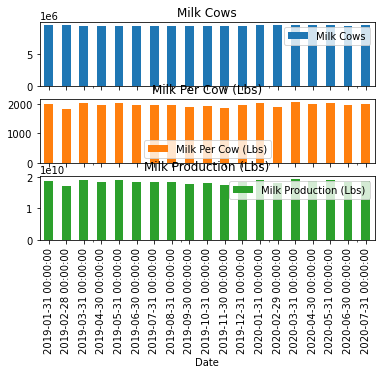

In [8]:
# plain vanilla 
monthly_national_df.plot(kind = "bar",
                        subplots = True)

### Plot interactive Time-Series

In [16]:
for col in monthly_national_df:
    # declare the figure
    fig = px.line(data_frame = monthly_national_df[col],
                  title=col + ' Time Series with Range Slider and Selectors',
                 )

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()